<a href="https://colab.research.google.com/github/Luisserra99/SSTD_2025/blob/main/projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Luís Eduardo Curi Serra
## Matrícula: 251033574

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [13]:
#Código das funções utilizadas.

# função ret exercício 1
def ret(x):
  if abs(x) > 0.5:
    return 0
  elif abs(x) == 0.5:
    return 0.5
  else:
    return 1


# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz.



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

In [14]:
#Resposta da questão 1a

T = 1/8
f0 = 1/4
T_total = 1/f0     # Tempo total de janela (4 segundos)

ts = np.arange(-T_total/2, T_total/2, T)
xn = []

xn = []
for t in ts:
    val = 8 * ret(t)
    xn.append(val)

print(xn)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.0, 8, 8, 8, 8, 8, 8, 8, 4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ .

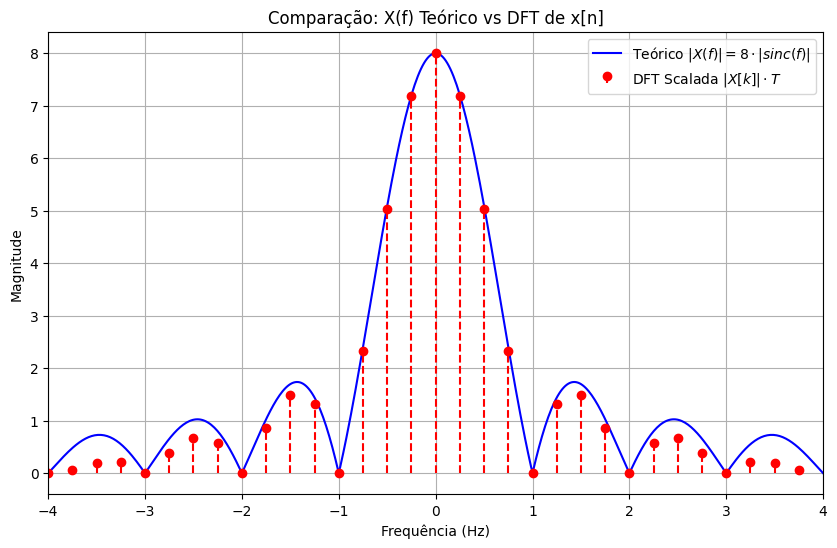

In [15]:
#Resposta da questão 1b

N = len(xn)

X_k = np.fft.fft(xn)

# Shift para centralizar a frequência zero no gráfico
X_k_shifted = np.fft.fftshift(X_k)

# Vetor de frequências da DFT
freqs_dft = np.fft.fftshift(np.fft.fftfreq(N, d=T))

# Cálculo da Transformada Contínua Teórica X(f)
f_continuo = np.linspace(-4, 4, 500)
X_f = 8 * np.sinc(f_continuo) # numpy.sinc já inclui o pi (sin(pi*x)/(pi*x))

# Plot
plt.figure(figsize=(10, 6))

# Plot da Teórica
plt.plot(f_continuo, np.abs(X_f), label=r'Teórico $|X(f)| = 8 \cdot |sinc(f)|$', color='blue')

# Plot da DFT (Escalada por T)
plt.stem(freqs_dft, np.abs(X_k_shifted) * T, linefmt='r--', markerfmt='ro', basefmt=' ',
         label=r'DFT Scalada $|X[k]| \cdot T$')

plt.title('Comparação: X(f) Teórico vs DFT de x[n]')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.show()

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde:
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

In [16]:
def u64(n):
  if n < 64:
    return 1
  else:
    return 0

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$.

In [17]:
#Resposta da questão 2a
n = np.arange(0, 256)
xn =[]

for i in n:
  xn.append(u64(i))

# FFT
X_k = np.fft.fft(xn)
freqs = np.fft.fftfreq(len(xn))

In [18]:
fc = 1/16
N = len(freqs)
Y_k = []

# Convolução no tempo = multi na freq
for i in range(N):
  if abs(freqs[i]) <= fc:
    Y_k.append(X_k[i])
  else:
    Y_k.append(0)
Y_k = np.array(Y_k)

# IFFT
yn = np.fft.ifft(Y_k)
yn = np.real(yn)

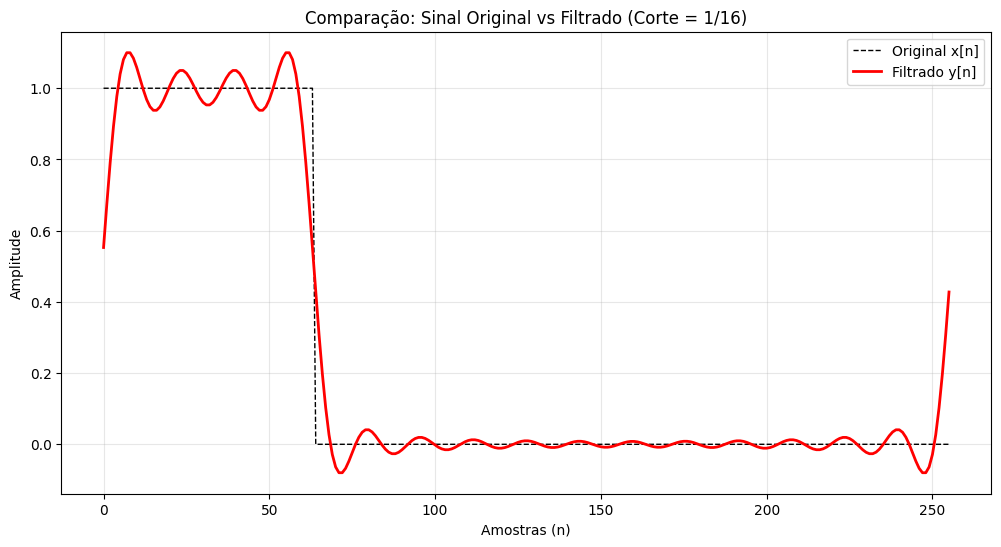

In [19]:
# Plotagem
plt.figure(figsize=(12, 6))

plt.plot(n, xn, 'k--', linewidth=1, label='Original x[n]')
plt.plot(n, yn, 'r-', linewidth=2, label='Filtrado y[n]')
plt.title(f'Comparação: Sinal Original vs Filtrado (Corte = 1/16)')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$.

/tmp/ipython-input-431402381.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.stem(freqs_shifted, 20*np.log10(np.abs(X_shifted)), markerfmt='.', basefmt=" ", linefmt='C0-', label=r'$x[n]$ ($|X(e^{j\omega})|$)')
/tmp/ipython-input-431402381.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.stem(freqs_shifted, 20*np.log10(np.abs(Y_shifted)), markerfmt='x', basefmt=" ", linefmt='C1-', label=r'$y[n]$ ($|X(e^{j\omega})|$)')


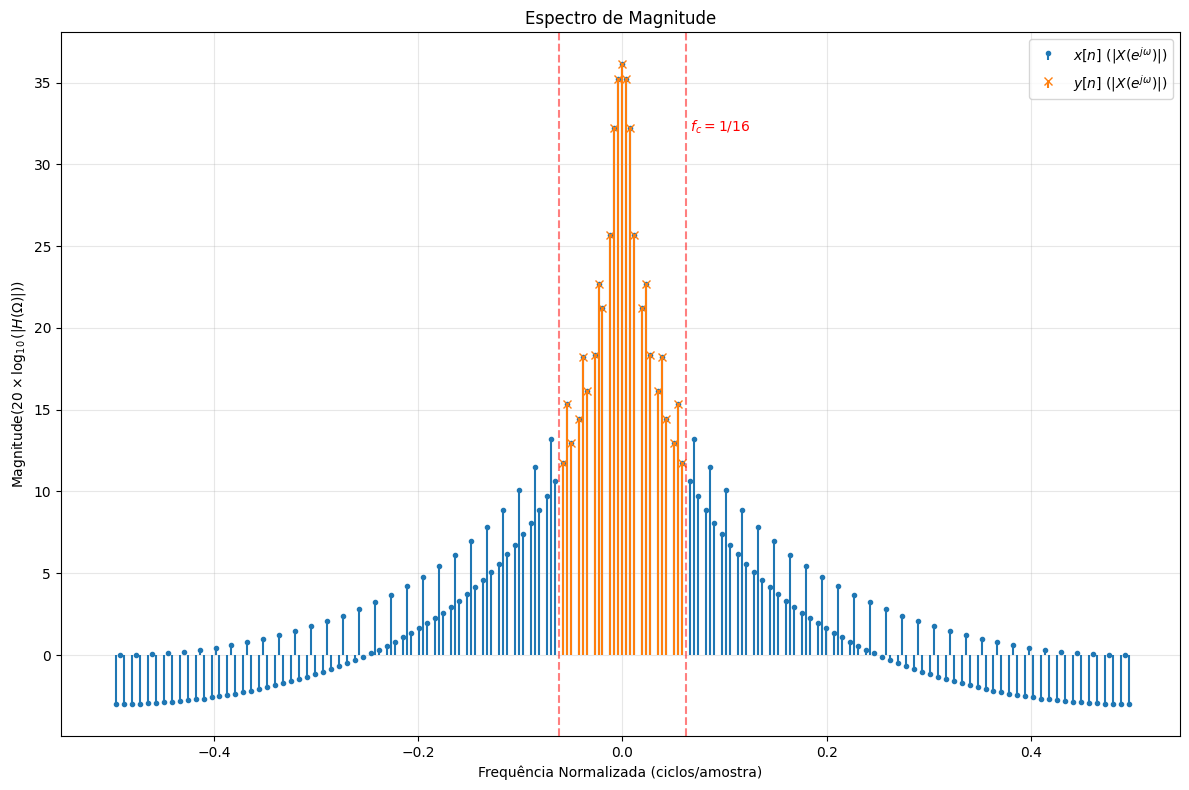

In [20]:
#Resposta da questão 2b

# Shift for better visualization (center 0 frequency)
X_shifted = np.fft.fftshift(X_k)
Y_shifted = np.fft.fftshift(Y_k)
freqs_shifted = np.fft.fftshift(freqs)

# Plotting
plt.figure(figsize=(12, 8))

# Plot magnitude of X[k]
plt.stem(freqs_shifted, 20*np.log10(np.abs(X_shifted)), markerfmt='.', basefmt=" ", linefmt='C0-', label=r'$x[n]$ ($|X(e^{j\omega})|$)')
plt.stem(freqs_shifted, 20*np.log10(np.abs(Y_shifted)), markerfmt='x', basefmt=" ", linefmt='C1-', label=r'$y[n]$ ($|X(e^{j\omega})|$)')
plt.title(r'Espectro de Magnitude')
plt.xlabel('Frequência Normalizada (ciclos/amostra)')
plt.ylabel(r'Magnitude($20\times \log_{10}(|H(\Omega)|)$)')
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight the cutoff region
plt.axvline(x=fc, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=-fc, color='r', linestyle='--', alpha=0.5)
plt.text(fc, np.max(np.abs(Y_shifted))/2, ' $f_c = 1/16$', color='r')

plt.tight_layout()

## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


In [21]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

n = np.arange(0,len(sinal))

# FFT
X_k = np.fft.fft(sinal)
freqs = np.fft.fftfreq(len(sinal))


fc = 1/16
N = len(freqs)
Y_k = []

# Convolução no tempo = multi na freq
for i in range(N):
  if abs(freqs[i]) <= fc:
    Y_k.append(X_k[i])
  else:
    Y_k.append(0)
Y_k = np.array(Y_k)

# IFFT
yn = np.fft.ifft(Y_k)
yn = np.real(yn)


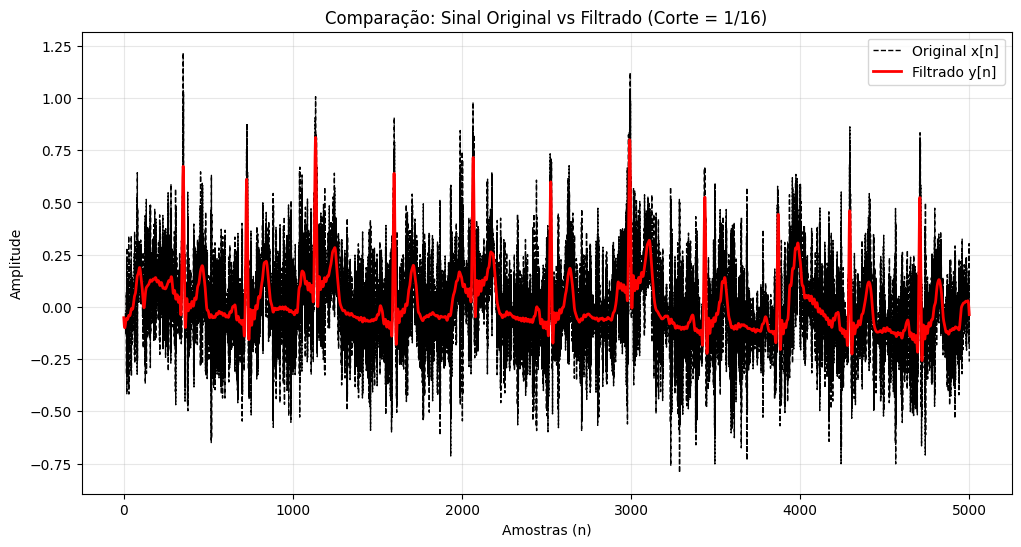

In [22]:
# Plotagem
plt.figure(figsize=(12, 6))

plt.plot(n, sinal, 'k--', linewidth=1, label='Original x[n]')
plt.plot(n, yn, 'r-', linewidth=2, label='Filtrado y[n]')
plt.title(f'Comparação: Sinal Original vs Filtrado (Corte = 1/16)')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-2813781052.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.stem(freqs_shifted, 20*np.log10(np.abs(Y_shifted)), markerfmt='x', basefmt=" ", linefmt='C1-', label=r'$y[n]$ ($|X(e^{j\omega})|$)')


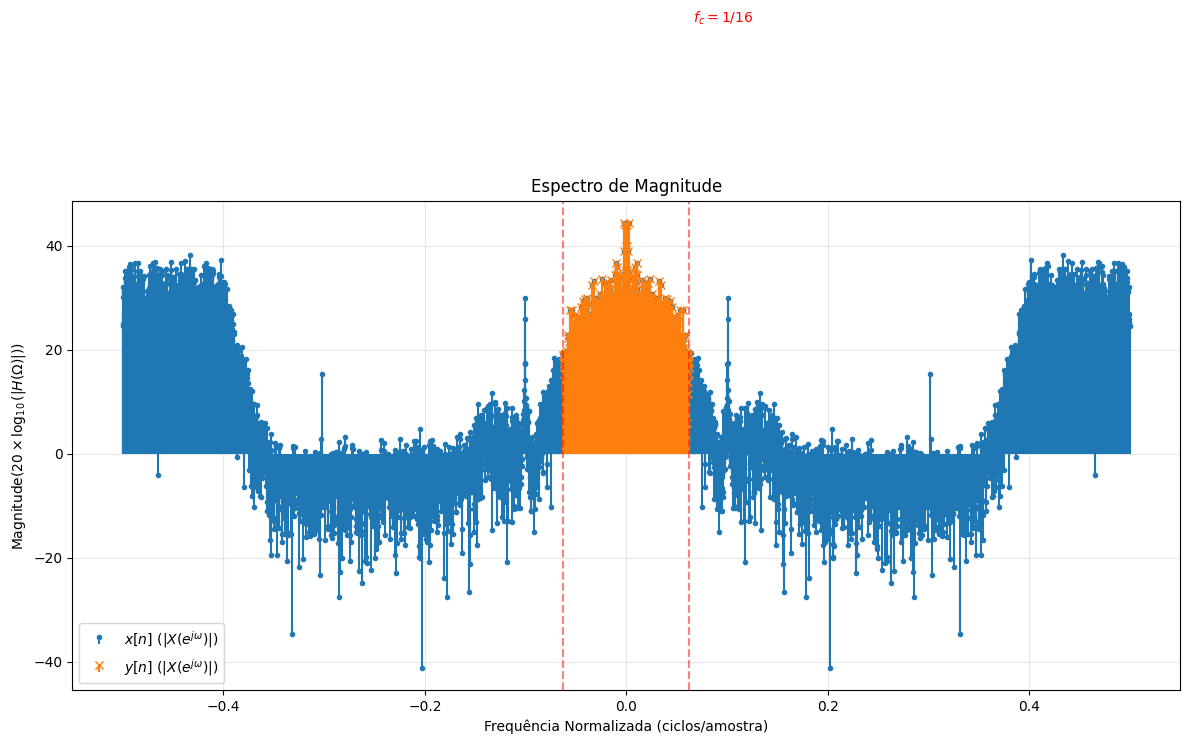

In [23]:


# Shift for better visualization (center 0 frequency)
X_shifted = np.fft.fftshift(X_k)
Y_shifted = np.fft.fftshift(Y_k)
freqs_shifted = np.fft.fftshift(freqs)

# Plotting
plt.figure(figsize=(12, 8))

# Plot magnitude of X[k]
plt.stem(freqs_shifted, 20*np.log10(np.abs(X_shifted)), markerfmt='.', basefmt=" ", linefmt='C0-', label=r'$x[n]$ ($|X(e^{j\omega})|$)')
plt.stem(freqs_shifted, 20*np.log10(np.abs(Y_shifted)), markerfmt='x', basefmt=" ", linefmt='C1-', label=r'$y[n]$ ($|X(e^{j\omega})|$)')
plt.title(r'Espectro de Magnitude')
plt.xlabel('Frequência Normalizada (ciclos/amostra)')
plt.ylabel(r'Magnitude($20\times \log_{10}(|H(\Omega)|)$)')
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight the cutoff region
plt.axvline(x=fc, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=-fc, color='r', linestyle='--', alpha=0.5)
plt.text(fc, np.max(np.abs(Y_shifted))/2, ' $f_c = 1/16$', color='r')

plt.tight_layout()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [24]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()


In [66]:
from re import S
def decodifica(n1,n2):
  tabela = [[1,2,3],
            [4,5,6],
            [7,8,9],
              ['*',0,"#"]]
  T1 = 0
  T2 = 0
# IDENTIFICA A COLUNA
  if n1 < 1272:
    T1 = 0
  elif 1272<= n1 < 1407:
    T1 = 1
  else:
    T1 = 2

#  IDENTIFICA A LINHA
  if n2 < 734:
    T2 = 0
  elif 734<= n2 < 811:
    T2 = 1
  elif 811<= n2 < 896:
    T2 = 2
  else:
    T2 = 3

  return tabela[T2][T1]

def numeros(sinal,info=True):
  fs = 8192
  n = int(len(sinal)/fs)
  number = ''

  for i in range(n):
    # Pega 1 segundo do sinal
    sinal_temp = sinal[i * fs : (i + 1) * fs]
    N = len(sinal_temp)

    # FFT
    X_k = np.fft.fft(sinal_temp)

    # Extrai a magnitude de metade devido a simetria
    X_k_mag = 20*np.log10(np.abs(X_k[:N//2]))

    # Extrai o intervalo de interesse
    X_k_mag = X_k_mag[600:1600]
    # Frquencias normalizada
    freqs_hz = np.fft.fftfreq(N, d=1.0/fs)[:N//2]

    # Extrai o intervalo de interesse
    freqs_hz = freqs_hz[600:1600]
    # Encontro os indices dos dois maiores picos
    indices_picos = np.argsort(X_k_mag)[-2:]
    frequencias_hz = freqs_hz[indices_picos]

    # Separa a alta e baixa frequência
    n2, n1 = sorted(frequencias_hz)

    # Decodifica
    if info:
      plt.figure(i)
      plt.plot(freqs_hz, X_k_mag)
      print(n1,n2)

    digit = decodifica(round(n1), round(n2))
    number += str(digit)

  return number

In [68]:
print(numeros(sinal1,False))
print(numeros(sinal2,False))
print(numeros(sinal3,False))

31075580
911
2446712


1477.0 697.0
1209.0 697.0
1336.0 941.0
1209.0 852.0
1336.0 770.0
1336.0 770.0
1336.0 852.0
1336.0 941.0
31075580


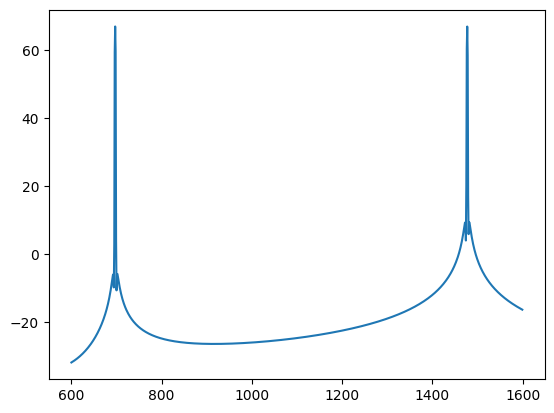

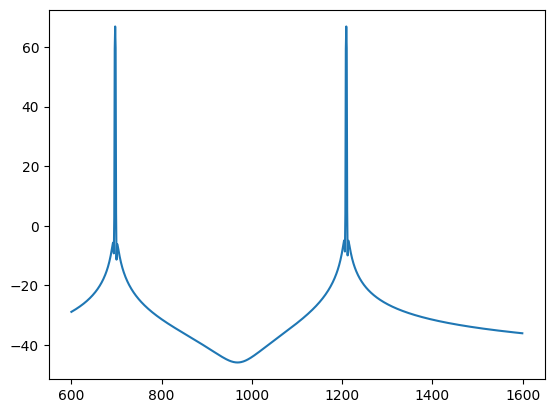

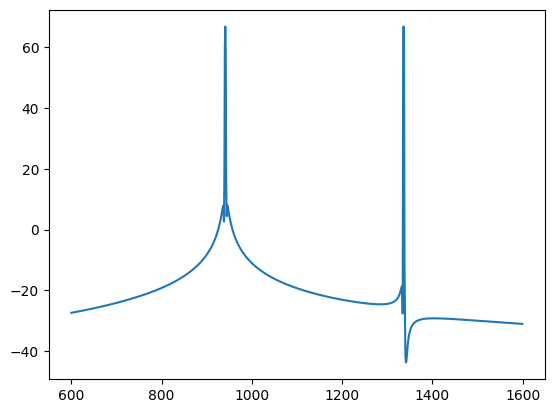

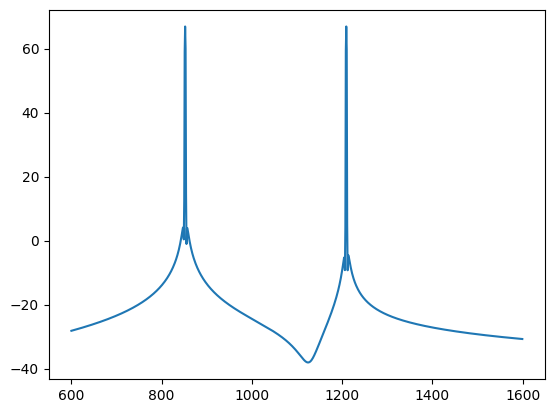

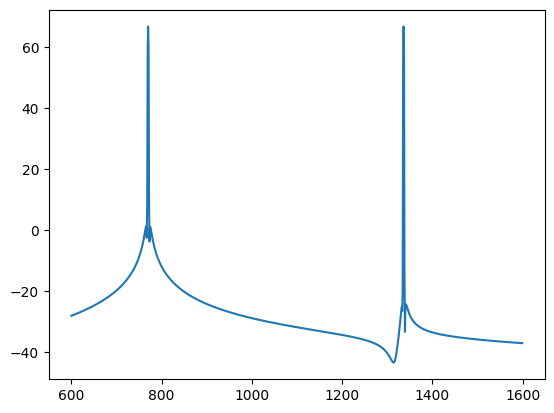

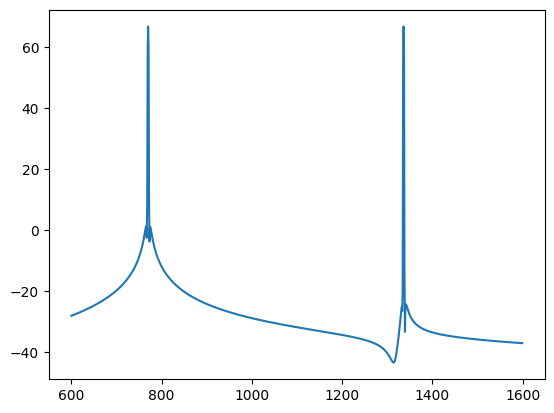

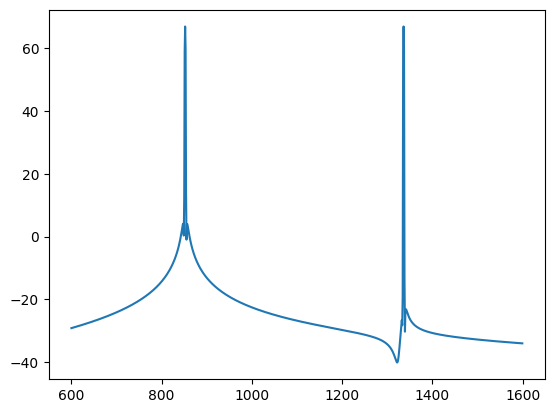

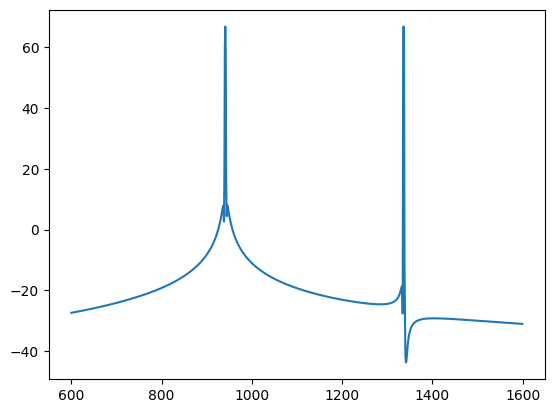

In [72]:
print(numeros(sinal1))

1477.0 852.0
1209.0 697.0
1209.0 697.0
911


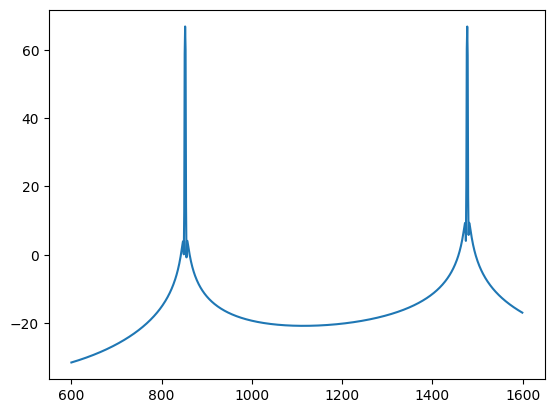

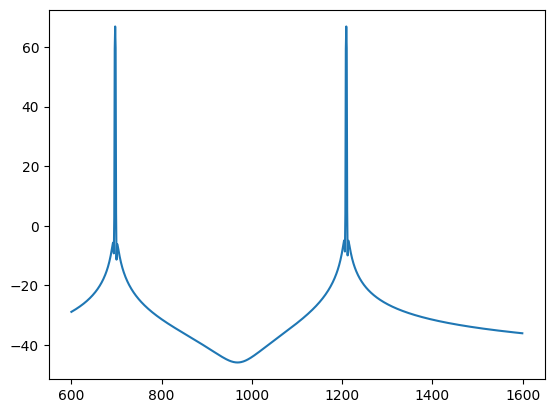

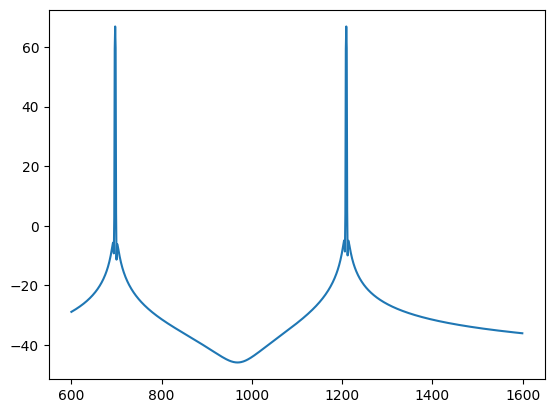

In [71]:
print(numeros(sinal2))

1336.0 697.0
1209.0 770.0
1209.0 770.0
1477.0 770.0
1209.0 852.0
1209.0 697.0
1336.0 697.0
2446712


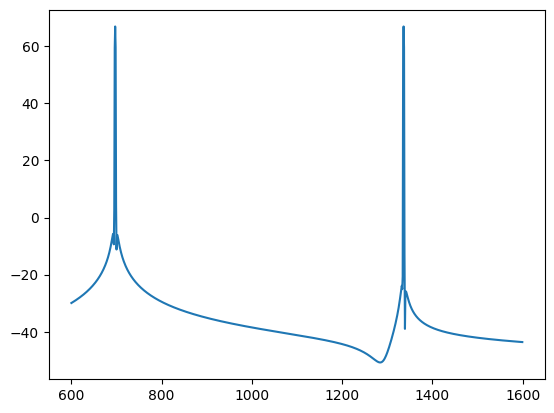

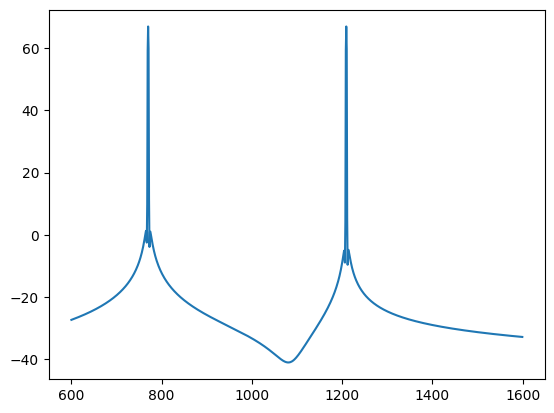

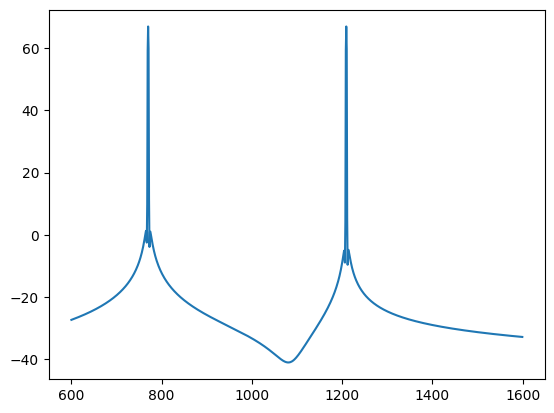

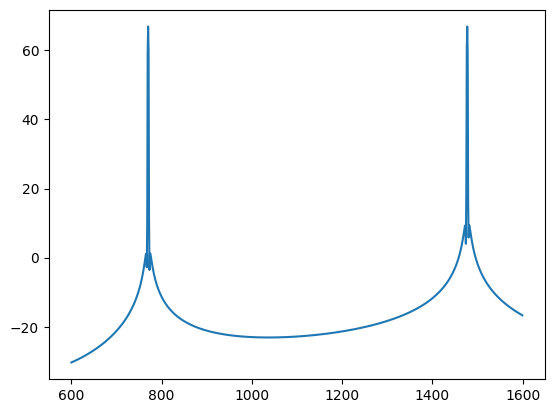

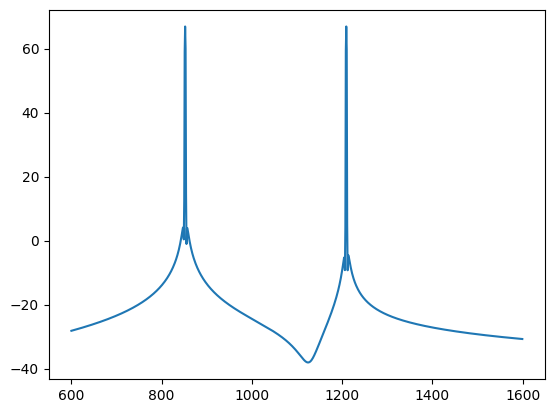

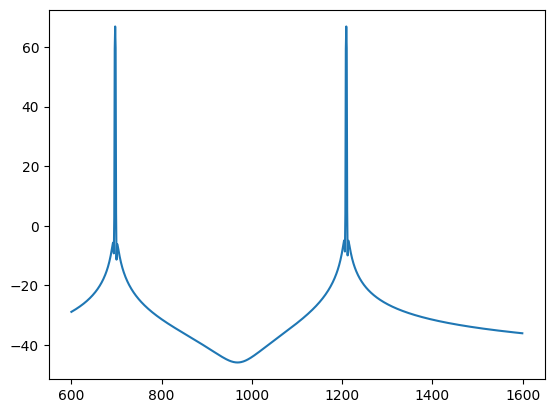

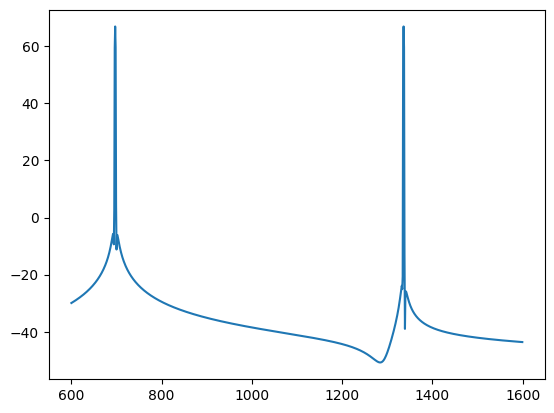

In [70]:
print(numeros(sinal3))